# Heart Disease Detection Project
## Objective
Build a system that can predict if a patient has heart disease based on their health vitals.


### Step 1: Data Loading and Initial Exploration

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/heart-data/dataset.csv')  # Replace with your actual file path

# Display the first few rows of the dataset
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Step 2: Data Preprocessing and Feature Engineering

In [3]:
# Check for missing values
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
data.columns


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [6]:
# Convert categorical columns to appropriate types if needed
data['sex'] = data['sex'].astype('category')
data['chest pain type'] = data['chest pain type'].astype('category')
data['fasting blood sugar'] = data['fasting blood sugar'].astype('category')
data['resting ecg'] = data['resting ecg'].astype('category')
data['exercise angina'] = data['exercise angina'].astype('category')
data['ST slope'] = data['ST slope'].astype('category')


In [8]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


### Step 3: Exploratory Data Analysis (EDA)

In [9]:
# Summary statistics for numeric columns
data.describe()

,age,resting bp s,cholesterol,max heart rate,oldpeak,target
count,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1190.000000
mean,-2.627217e-16,3.030256e-16,7.165137e-17,-4.060244e-16,8.956421e-17,0.528571
std,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,0.499393
min,-2.749564e+00,-7.197486e+00,-2.075047e+00,-3.125928e+00,-3.244162e+00,0.000000
25%,-7.184065e-01,-6.619309e-01,-2.205991e-01,-7.344195e-01,-8.497924e-01,0.000000
50%,2.991489e-02,-1.173013e-01,1.838284e-01,3.007918e-02,-2.972455e-01,1.000000
75%,6.713332e-01,4.273283e-01,5.857899e-01,7.945778e-01,6.236660e-01,1.000000
max,2.488685e+00,3.695106e+00,3.872997e+00,2.441190e+00,4.859859e+00,1.000000


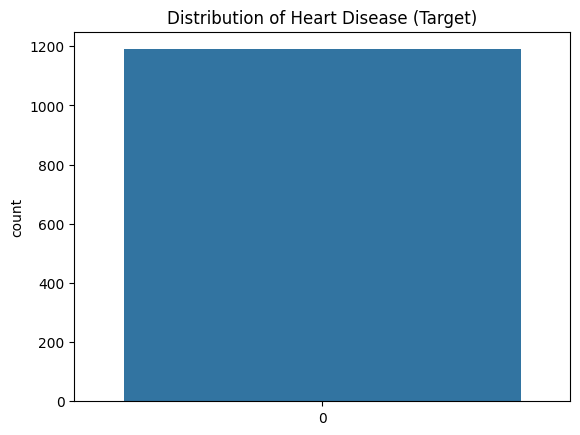

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the target variable distribution
sns.countplot(data['target'])
plt.title('Distribution of Heart Disease (Target)')
plt.show()

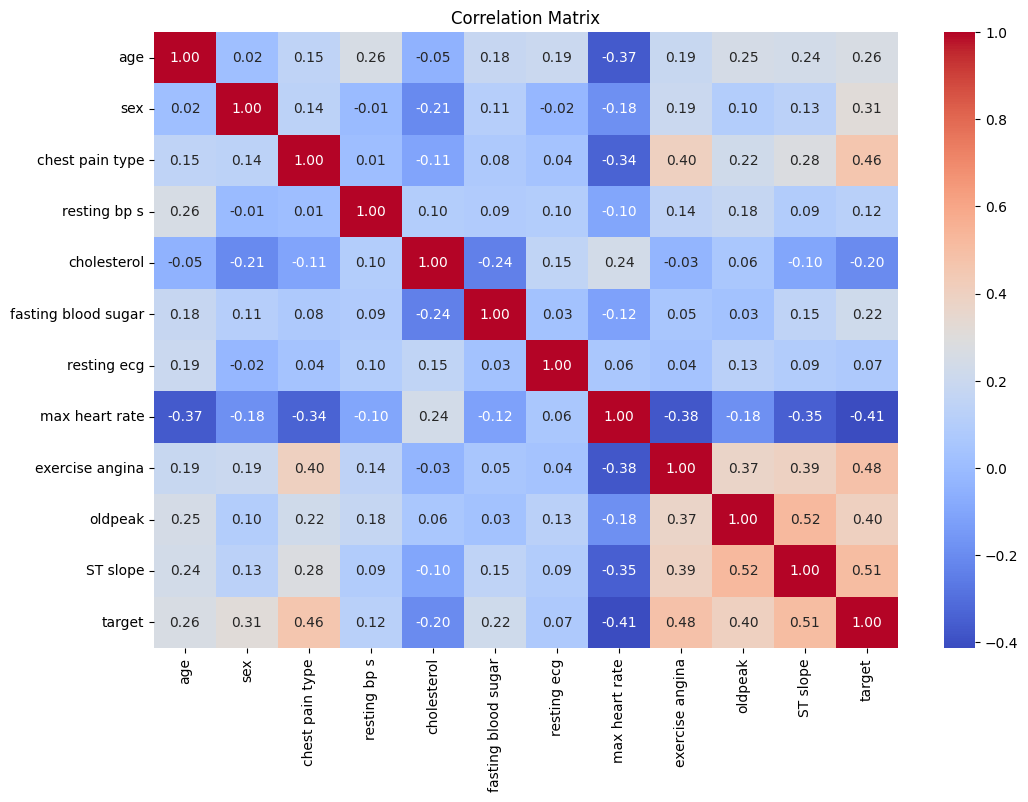

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Step 4: Modeling and Evaluation

In [14]:
from sklearn.model_selection import train_test_split

# Define feature matrix X and target vector y
X = data.drop(columns='target')
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9495798319327731
Confusion Matrix:
 [[100   7]
 [  5 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [23]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Cross-Validation Accuracy: 0.9085918985946542
Test Accuracy: 0.9453781512605042
Confusion Matrix:
[[ 98   9]
 [  4 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



### Step 5: Saving and Loading the Model

In [24]:
import joblib

# Save the model
joblib.dump(best_model, 'heart_disease_model.joblib')
print("Model saved as heart_disease_model.joblib")

# To load the model:
loaded_model = joblib.load('heart_disease_model.joblib')

Model saved as heart_disease_model.joblib


In [25]:
from joblib import dump
dump(scaler, 'scaler.joblib')


['scaler.joblib']